# 鸢尾花数据分析与可视化报告

## 1.研究的目的与问题

### 1.1 研究的目的

1. 探究鸢尾花数据集的基本特征，包括属性的分布、均值、标准差等统计量。
2. 通过可视化方法展示不同种类鸢尾花在这些属性上的差异。
3. 探究建立模型来预测鸢尾花的种类的可行性。

### 1.2 研究的问题

1. 鸢尾花数据集中各属性的基本统计量（如均值、中位数、标准差）是什么？
2. 在各种类鸢尾花中，这些统计量有哪些差异？
3. 哪些属性对于区分不同种类的鸢尾花最具有辨识度？

## 2. 数据集介绍

### 2.1 数据来源

* 本报告使用iris.csv文件作为数据集。
* iris.csv的[原始数据](https://archive.ics.uci.edu/ml/datasets/Iris)来自于[加州大学欧文分校的机器学习库](https://archive.ics.uci.edu/ml/index.php)。
* 本报告中使用的iris.csv文件对原始文件进行了整理。

### 2.2 数据说明

* 数据集收集了150条鸢尾花数据，分为三个种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾）和 Iris Virginica（弗吉尼亚鸢尾）。每个种类包含50条数据。

<img src="img/Iris_Species.png" alt="不同种类的鸢尾花" width="640">

* 每条数据记录了鸢尾花的四个特征：花瓣长度（petal length）、花瓣宽度（petal width）、花萼长度（sepal length）和花萼宽度（sepal width）。

<img src="img/Iris_Petal_Sepal_Dimensions.png" alt="鸢尾花四个特征的含义" width="640">

* 数据集的变量和类型

| 列名             | 含义                 |类型     |
|-----------------|----------------------|--------|
| SepalLengthCm   | 花萼的长度，以厘米为单位 |float64 |
| SepalWidthCm    | 花萼的宽度，以厘米为单位 |float64 |
| PetalLengthCm   | 花瓣的长度，以厘米为单位 |float64 |
| PetalWidthCm    | 花瓣的宽度，以厘米为单位 |float64 |
| Species         | 所属的鸢尾花种类       |object |

## 3.支持库与数据集的导入

### 3.1支持库的导入

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("支持库导入成功！")

支持库导入成功！


### 3.2 数据集的导入

In [2]:
# 读取数据集
iris = pd.read_csv("../data/iris.csv")

# 显示数据的前5行
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 显示数据集的后5行
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# 随机抽取5行显示
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,115,5.8,2.8,5.1,2.4,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor


## 4.数据分析与可视化

### 4.1 数据集基本情况探索

In [5]:
# 显示数据集的大小
print(f"数据集共有{iris.shape[0]}行,{iris.shape[1]}列")

数据集共有150行,6列


In [6]:
# 显示数据集中列的基本信息
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# 查看各属性的基本统计量
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


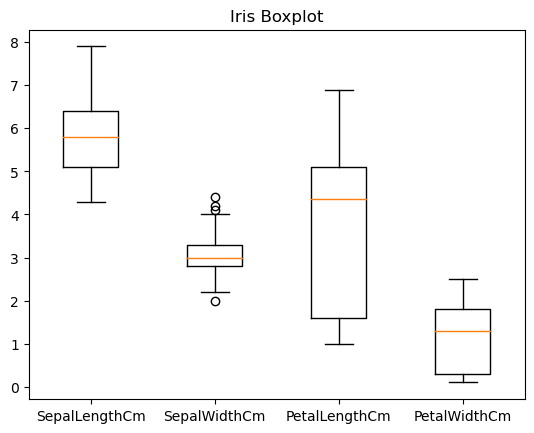

In [8]:
# 绘制箱线图来可视化数据集的基本统计量。

# 创建一个包含一个子图的 figure 对象和一个 Axes 对象
fig, ax = plt.subplots()

# 绘制鸢尾花数据集中的属性箱线图
ax.boxplot(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

# 设置图表标题
ax.set_title("Iris Boxplot")

# 设置y轴刻度标签
ax.set_xticklabels(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

# 显示图表
plt.show()

In [9]:
# 查看种类的分布情况
iris.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

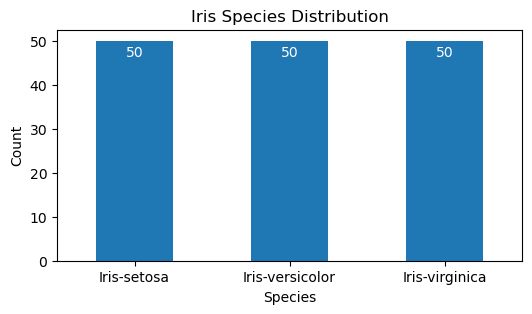

In [10]:
# 通过绘制柱状图来展示种类的分布

# 统计每个品种的数量
class_counts = iris['Species'].value_counts()

# 设置画布的大小为9*5英寸
plt.figure(figsize=(6, 3))

# 绘制柱状图
ax = class_counts.plot(kind='bar')

# 添加标签和标题
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Iris Species Distribution')

# 旋转x轴标签
plt.xticks(rotation=0)

# 在柱状图上显示数量
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()*0.98),
                ha='center', va='top',color="white")

# 显示图形
plt.show()

在鸢尾花不同种类柱状图中可以看到，三个种类的鸢尾花分布均匀，每个种类的数量都为50。

### 4.2 探索在各种类鸢尾花中基本统计量的差异

In [11]:
# 获取山鸢尾（Iris-setosa）的记录
Iris_setosa = iris[iris.Species=='Iris-setosa']
#Iris_setosa.shape

In [12]:
# 获取杂色鸢尾（Iris Versicolour）的记录
Iris_versicolor = iris[iris.Species=='Iris-versicolor']
#Iris_versicolor.shape

In [13]:
# 获取弗吉尼亚鸢尾 Iris Virginica）的记录
Iris_virginica = iris[iris.Species=='Iris-virginica']
#Iris_virginica.shape

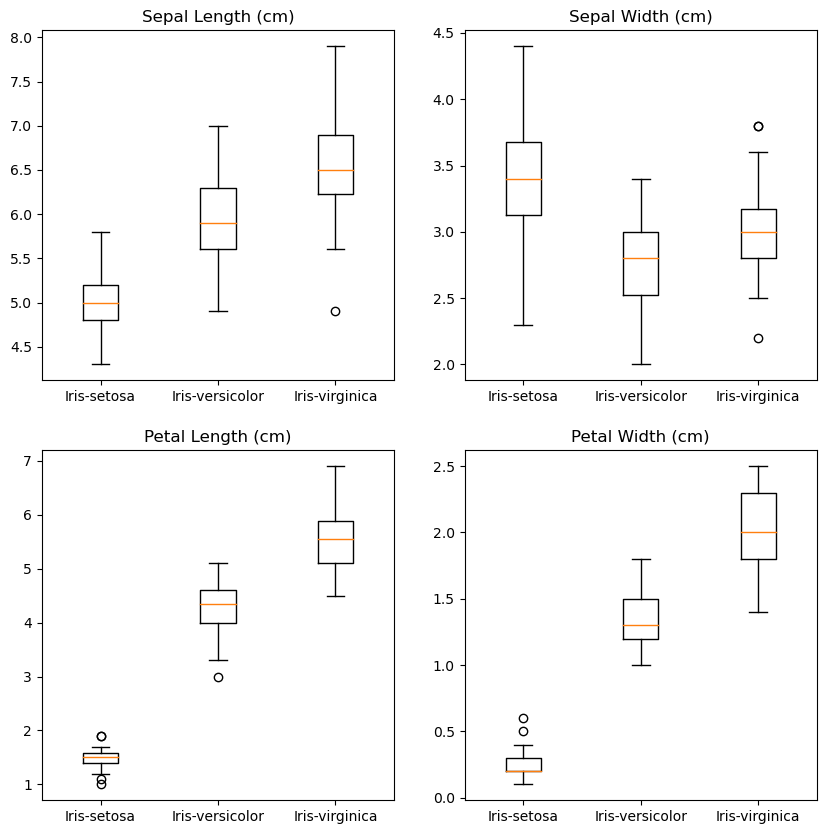

In [14]:
# 创建一个2x2的画布
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 准备数据
data = [Iris_setosa, Iris_versicolor, Iris_virginica]
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# 第一个子图：SepalLengthCm
axs[0, 0].boxplot([x['SepalLengthCm'] for x in data], labels=labels)
axs[0, 0].set_title('Sepal Length (cm)')

# 第二个子图：SepalWidthCm
axs[0, 1].boxplot([x['SepalWidthCm'] for x in data], labels=labels)
axs[0, 1].set_title('Sepal Width (cm)')

# 第三个子图：PetalLengthCm
axs[1, 0].boxplot([x['PetalLengthCm'] for x in data], labels=labels)
axs[1, 0].set_title('Petal Length (cm)')

# 第四个子图：PetalWidthCm
axs[1, 1].boxplot([x['PetalWidthCm'] for x in data], labels=labels)
axs[1, 1].set_title('Petal Width (cm)')


plt.show()

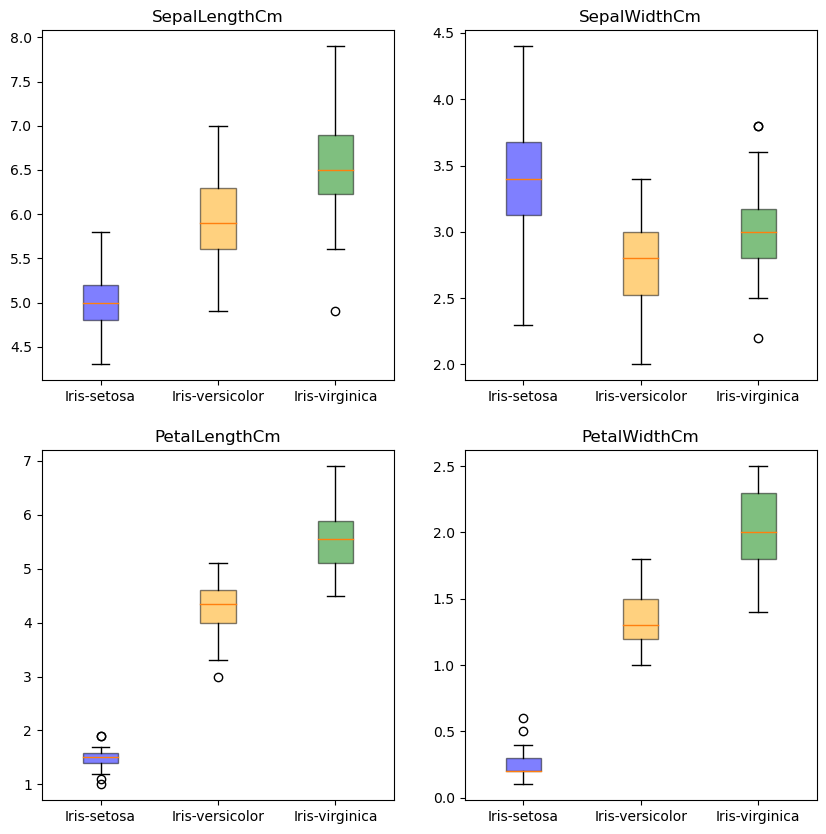

In [15]:
# 创建一个2x2的画布
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 准备数据
data = [Iris_setosa, Iris_versicolor, Iris_virginica]
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'orange', 'green']

# 为每个子图绘制箱线图并设置颜色
for i in range(2):
    for j in range(2):
        feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'][i*2+j]
        bp = axs[i, j].boxplot([x[feature] for x in data], labels=labels,patch_artist=True)
        
        # 设置每个箱体的颜色
        for box, color in zip(bp['boxes'], colors):
            box.set_facecolor(color)
            box.set_alpha(0.5)
        
        axs[i, j].set_title(f'{feature}')

plt.show()

可以看到，在花萼长度（Sepal Length）和花萼宽度（Sepal Width）上，三种鸢尾花都有重叠的区域。在花瓣长度（Petal Length）和花瓣宽度（Petal Width）上，山鸢尾（Iris-setosa）和杂色鸢尾（Iris-setosa）以及弗吉尼亚鸢尾（Iris Virginica）都有明显的分界线。因此花瓣长度或花瓣宽度对于区分山鸢尾与其他两种鸢尾花具有更好的辨识度。

为了更清楚的看到，这四个属性在不同种类上的分布，下面我们绘制分种类和分属性的直方图。

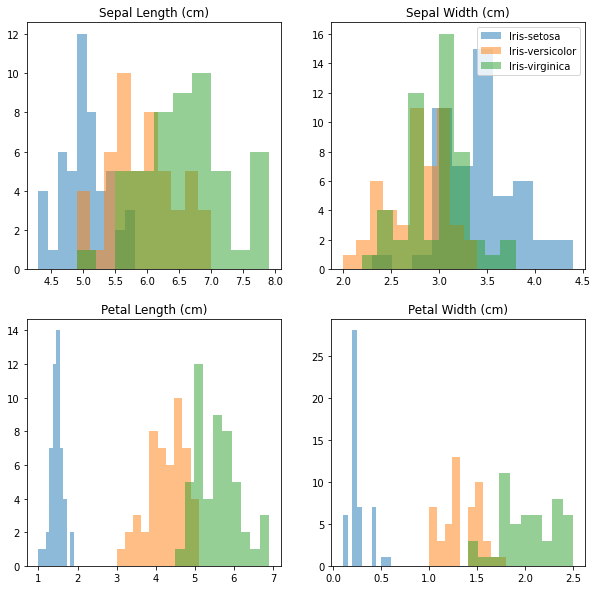

In [56]:
# 创建一个2x2的画布
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 第一个子图：SepalLengthCm
for i, label in enumerate(labels):
    axs[0, 0].hist(data[i]['SepalLengthCm'], alpha=0.5, label=label)
axs[0, 0].set_title('Sepal Length (cm)')
#axs[0, 0].legend()

# 第二个子图：SepalWidthCm
for i, label in enumerate(labels):
    axs[0, 1].hist(data[i]['SepalWidthCm'], alpha=0.5, label=label)
axs[0, 1].set_title('Sepal Width (cm)')
axs[0, 1].legend()

# 第三个子图：PetalLengthCm
for i, label in enumerate(labels):
    axs[1, 0].hist(data[i]['PetalLengthCm'], alpha=0.5,  label=label)
axs[1, 0].set_title('Petal Length (cm)')

# 第四个子图：PetalWidthCm
for i, label in enumerate(labels):
    axs[1, 1].hist(data[i]['PetalWidthCm'], alpha=0.5,label=label)
axs[1, 1].set_title('Petal Width (cm)')

plt.show()

在分种类和分属性的直方图中可以更加清晰的看到，在花萼长度（Sepal Length）和花萼宽度（Sepal Width）上三种鸢尾花的重叠区域。在花瓣长度（Petal Length）和花瓣宽度（Petal Width）上，山鸢尾（Iris-setosa）和杂色鸢尾（Iris-setosa）以及弗吉尼亚鸢尾（Iris Virginica）有明显的分界线。再次体现出花瓣长度或花瓣宽度对于区分山鸢尾与其他两种鸢尾花具有更好的辨识度。

下面尝试不同的属性两两结合绘制散点图，探索是否不同的属性组合可以表现出杂色鸢尾（Iris-setosa）和弗吉尼亚鸢尾（Iris Virginica）明显的分界线。

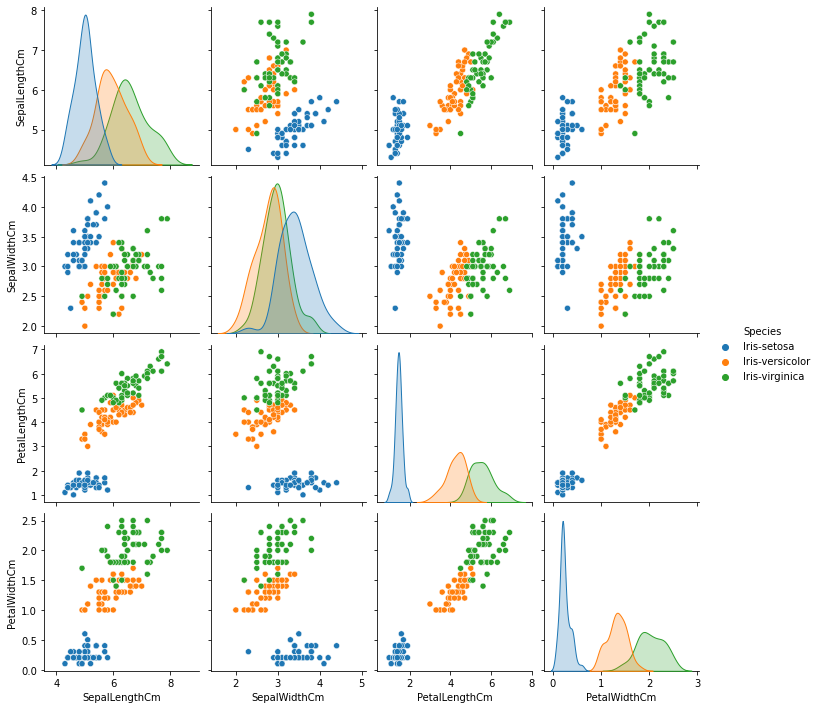

In [57]:
# 绘制鸢尾花数据集的pairplot
sns.pairplot(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue='Species')
plt.show()

在不同属性两两组合后，可以看到在：
* 花萼长度与花瓣长度
* 花萼宽度与花瓣长度
* 花瓣长度与花萼宽度

这三组属性组合上，杂色鸢尾（Iris-versicolor）和弗吉尼亚鸢尾（Iris-virginica）都有更好的分离度，但是并没有明显的分界线。这表明，仅通过属性的两两组合可能不足以准确地区分这两种鸢尾花。

## 5.结论

1. 根据数据分析与可视化结果，可以看出，山鸢尾（Iris-setosa）与其他两种鸢尾花在很多属性以及属性组合上有显著的分界线，这意味着我可以相对容易地区分山鸢尾与其他两种鸢尾花。

2. 杂色鸢尾（Iris-versicolor）和弗吉尼亚鸢尾（Iris-virginica）在很多属性以及属性组合中并没有明显的分界线。这表明，仅通过这些属性的两两组合可能不足以准确地区分这两种鸢尾花。

3. 我们可以尝试建立一个预测模型，通过使用多个属性和更复杂的分类算法来预测鸢尾花的种类。